In [1]:
!date
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
sns.set_context('paper')
sns.set_style('whitegrid')
pd.set_option('max_rows',10)

Thu Aug 25 20:15:27 PDT 2016


In [2]:
df = pd.DataFrame()

for i in range(10):
    for w in range(-4,49,4):
        dname = '/homes/abie/projects/2016/TICS/'
        fname = dname + 'auc_results_{:02d}_{:02d}.csv'.format(i,w)
        t = pd.read_csv(fname)
        df = df.append(t)
df.shape

(5600, 6)

In [3]:
#df.head()

In [4]:
df.clf_name.value_counts()

PLR    1400
RF     1400
NB     1400
GBM    1400
Name: clf_name, dtype: int64

In [5]:
df.groupby(['clf_name', 'weeks_after']).auc.count().unstack().fillna('')

weeks_after,-4,0,4,8,12,16,20,24,28,32,36,40,44,48
clf_name,,,,,,,,,,,,,,
GBM,100,100,100,100,100,100,100,100,100,100,100,100,100,100
NB,100,100,100,100,100,100,100,100,100,100,100,100,100,100
PLR,100,100,100,100,100,100,100,100,100,100,100,100,100,100
RF,100,100,100,100,100,100,100,100,100,100,100,100,100,100


In [6]:
g = df.groupby(['clf_name', 'weeks_after'])
t = g.auc.mean()
t = np.round(t*100, 1)
t.unstack().fillna('')

weeks_after,-4,0,4,8,12,16,20,24,28,32,36,40,44,48
clf_name,,,,,,,,,,,,,,
GBM,50.1,57.5,63.3,64.9,66.2,66.9,68.3,68.9,69.5,70.5,71.5,72.2,73.5,75.8
NB,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
PLR,51.1,50.5,51.8,52.3,52.6,52.9,53.1,53.5,53.6,53.6,54.0,54.3,55.4,56.5
RF,51.4,54.2,57.2,57.5,58.4,59.1,59.8,59.5,60.7,61.1,61.6,62.4,64.0,66.0


In [7]:
# # useful for seeing what reps are not completed
# df['rep_str'] = df.rep.astype(str) + ' '
# g = df.groupby(['clf_name', 'weeks_after'])
# t = g.rep_str.sum()
# t.unstack().fillna('')

In [8]:
def pct_UI(s):
    return np.round(100*s.describe(percentiles=[.025, .975]).loc[['50%', '2.5%', '97.5%']], 1)
g = df[df.weeks_after.isin([48, 24, 12, 0])].groupby(['clf_name', 'weeks_after'])
summary = g.auc.apply(pct_UI)
summary.unstack(level=1).unstack()

weeks_after    0                 12                24                48        \
              50%  2.5% 97.5%   50%  2.5% 97.5%   50%  2.5% 97.5%   50%  2.5%   
clf_name                                                                        
GBM          57.3  52.9  62.4  66.2  61.9  70.6  68.8  64.6  74.2  75.7  71.9   
NB           50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0  50.0   
PLR          50.9  45.8  54.6  52.6  47.9  58.4  53.5  48.4  59.2  56.3  51.0   
RF           53.9  49.5  58.7  58.7  52.8  64.1  59.5  53.0  63.9  66.3  59.6   

weeks_after        
            97.5%  
clf_name           
GBM          80.2  
NB           50.0  
PLR          61.6  
RF           70.8

In [9]:
sns.set_style('whitegrid')

In [10]:
g = df.groupby(['clf_name', 'weeks_after'])
summary = g.auc.apply(pct_UI)


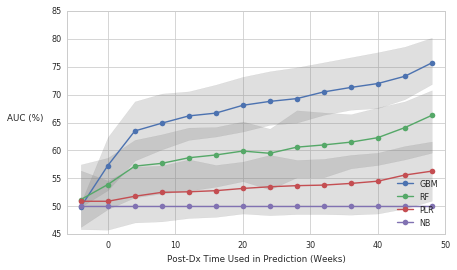

In [11]:
#t = summary.unstack().loc['GBM']
def my_plot(name):
    t = summary.unstack().loc[name]
    plt.plot(t.index, t['50%'], 'o-', label=name)
    plt.fill_between(t.index, t['2.5%'], t['97.5%'], color='grey', alpha=.25)
    plt.xlabel('Post-Dx Time Used in Prediction (Weeks)')
    plt.ylabel('AUC (%) ', rotation=0, ha='right')
    plt.subplots_adjust(left=.2)

plt.figure(figsize=(7.5, 4))
my_plot('GBM')
my_plot('RF')
my_plot('PLR')
my_plot('NB')
plt.legend(loc="lower right")
plt.axis(xmin=-6, ymin=45)
plt.savefig('/homes/abie/projects/2016/new_debut/auc.png', dpi=300)